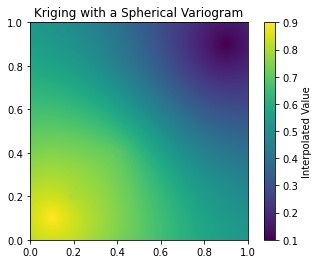

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pykrige.ok import OrdinaryKriging
from pykrige.kriging_tools import write_asc_grid

# Сгенерируем некоторые тестовые данные
# Это будут произвольные точки с некоторыми значениями
data = np.array([[0.1, 0.1, 0.9], 
                 [0.2, 0.2, 0.8], 
                 [0.4, 0.4, 0.7], 
                 [0.9, 0.9, 0.1]])

# Разделяем данные на координаты и значения
X = data[:, :2]
y = data[:, 2]

# Создаем экземпляр кригинга с использованием сферической вариограммы
OK = OrdinaryKriging(X[:, 0], X[:, 1], y, variogram_model='spherical')

# Создаем сетку для интерполяции
gridx = np.linspace(0.0, 1.0, 100)
gridy = np.linspace(0.0, 1.0, 100)

# Применяем кригинг к сетке
z, ss = OK.execute('grid', gridx, gridy)

# Визуализация
plt.imshow(z, extent=(0, 1, 0, 1), origin='lower')
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.colorbar(label='Interpolated Value')
plt.title("Kriging with a Spherical Variogram")
plt.show()
